<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Week-2-Challenge" data-toc-modified-id="Week-2-Challenge-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Week 2 Challenge</a></span></li><li><span><a href="#Controller-Design:-An-Introduction-to-Timers-and-Counters" data-toc-modified-id="Controller-Design:-An-Introduction-to-Timers-and-Counters-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Controller Design: An Introduction to Timers and Counters</a></span><ul class="toc-item"><li><span><a href="#Timers" data-toc-modified-id="Timers-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Timers</a></span></li><li><span><a href="#Counters" data-toc-modified-id="Counters-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Counters</a></span></li></ul></li><li><span><a href="#Model-Development:-Timers-as-Finite-State-Machines" data-toc-modified-id="Model-Development:-Timers-as-Finite-State-Machines-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model Development: Timers as Finite State Machines</a></span><ul class="toc-item"><li><span><a href="#State-Transition-Diagram" data-toc-modified-id="State-Transition-Diagram-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>State Transition Diagram</a></span></li><li><span><a href="#State-Transition-Table" data-toc-modified-id="State-Transition-Table-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>State Transition Table</a></span></li></ul></li><li><span><a href="#Model-Development:-Counters-as-Finite-State-Machines" data-toc-modified-id="Model-Development:-Counters-as-Finite-State-Machines-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model Development: Counters as Finite State Machines</a></span><ul class="toc-item"><li><span><a href="#State-Transition-Diagram" data-toc-modified-id="State-Transition-Diagram-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>State Transition Diagram</a></span></li><li><span><a href="#State-Transition-Table" data-toc-modified-id="State-Transition-Table-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>State Transition Table</a></span></li></ul></li><li><span><a href="#Exercise:--Submit-as-Part-of-Lab-2" data-toc-modified-id="Exercise:--Submit-as-Part-of-Lab-2-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exercise:  Submit as Part of Lab 2</a></span><ul class="toc-item"><li><span><a href="#Controller-Design:-Vending-Machine" data-toc-modified-id="Controller-Design:-Vending-Machine-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Controller Design: Vending Machine</a></span></li><li><span><a href="#Controller-Design-and-Validation:-Timers" data-toc-modified-id="Controller-Design-and-Validation:-Timers-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Controller Design and Validation: Timers</a></span></li><li><span><a href="#Controller-Design-and-Validation:-Counters" data-toc-modified-id="Controller-Design-and-Validation:-Counters-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Controller Design and Validation: Counters</a></span></li></ul></li></ul></div>

**Important: The cell below this one must be run before the assignments will function.**

In [8]:
from metakernel import register_ipython_magics
register_ipython_magics()

# Week 2 Challenge

In lab this week you will be asked to design a controller for your gate system that will raise the gate for a specificed amount of time, will lower the gate once the time is reached, and then use a sensor to determine if it should close all the way or re-open because the robot has not moved through the gate.
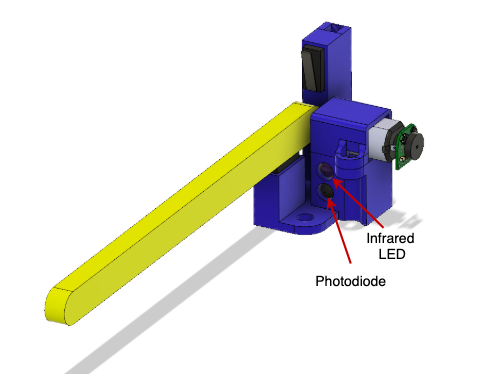

If after 3 attempts, the object has not moved out of the way of the gate, it stops trying and enters a fault mode.

Consider how a state machine operating a system like this one might "know" to hold the gate open for certain amount of time. As an operator, would you like to know what its doing so you know the controller is working properly even though nothing is happening? How will it keep track of the fact it has tried 3 times before it gives up?

Today's notebook is an introduction to the tools commonly used in finite state machine design to facilitate this type of behavior. 





# Controller Design: An Introduction to Timers and Counters



## Timers

In many applications where a FSM is a good choice for high-level program operation, you'll find yourself needing to "bake in" smaller state machines to handle small tasks. For instance: if you need to create a system that "waits" for a specified period of time after a button is pressed, or requires that a button is pressed for a particular length of time to "make sure" that the user meant to enter a particular machine state, you'll likely need to implement (or use) some kind of **timer.** 

Timers behave in the following way:

* When the boolean input to the timer is TRUE, the timer counts up (usually in milliseconds).
* When the elapsed time is greater than some threshold, the timer's output variable is set to TRUE. Otherwise it is FALSE.
* When the input to the timer is FALSE, the timer stops counting and the elapsed time is *reset* to zero.

## Counters

A counter, which is another example of a finite state machine that often "lives inside" of or is used by larger FSMs, has three inputs. 

* If the user (or the state transition logic) sets the "up" input true with a *unique rising edge* (was false, now true-- like a button press), an internal variable (integer) in the counter will count up by one. 
* If the using input sets the "down" input to be true with a "unique rising edge",it will bring the count (the counter's "accumulator") down by one. Generally, counters have a minimum value of 0.
* Whenever the "reset" input on the counter is true, the count is resets to zero. 
* When the counter reaches a preset value the output variable is set to TRUE.  Otherwise it is FALSE.

# Model Development: Timers as Finite State Machines

While industrial controllers (and some of our simulators) have built-in timers and counters, Arduino based controllers (used in Lab and on the Zumo) require that you create them yourself.  Therefore, we will now consider how to construct a timer and counte "from scratch" so that you will be able to program your own for use in the labs and the zumo projects.

To do this we'll model a timer as a finite state machine. We've provided an exercise at the end to assess your understanding in basic controller.

## State Transition Diagram

As with any state machine design, the first step is to determine what states we need to describe our timer. We propose that we work with a very simple state machine structure, given below.

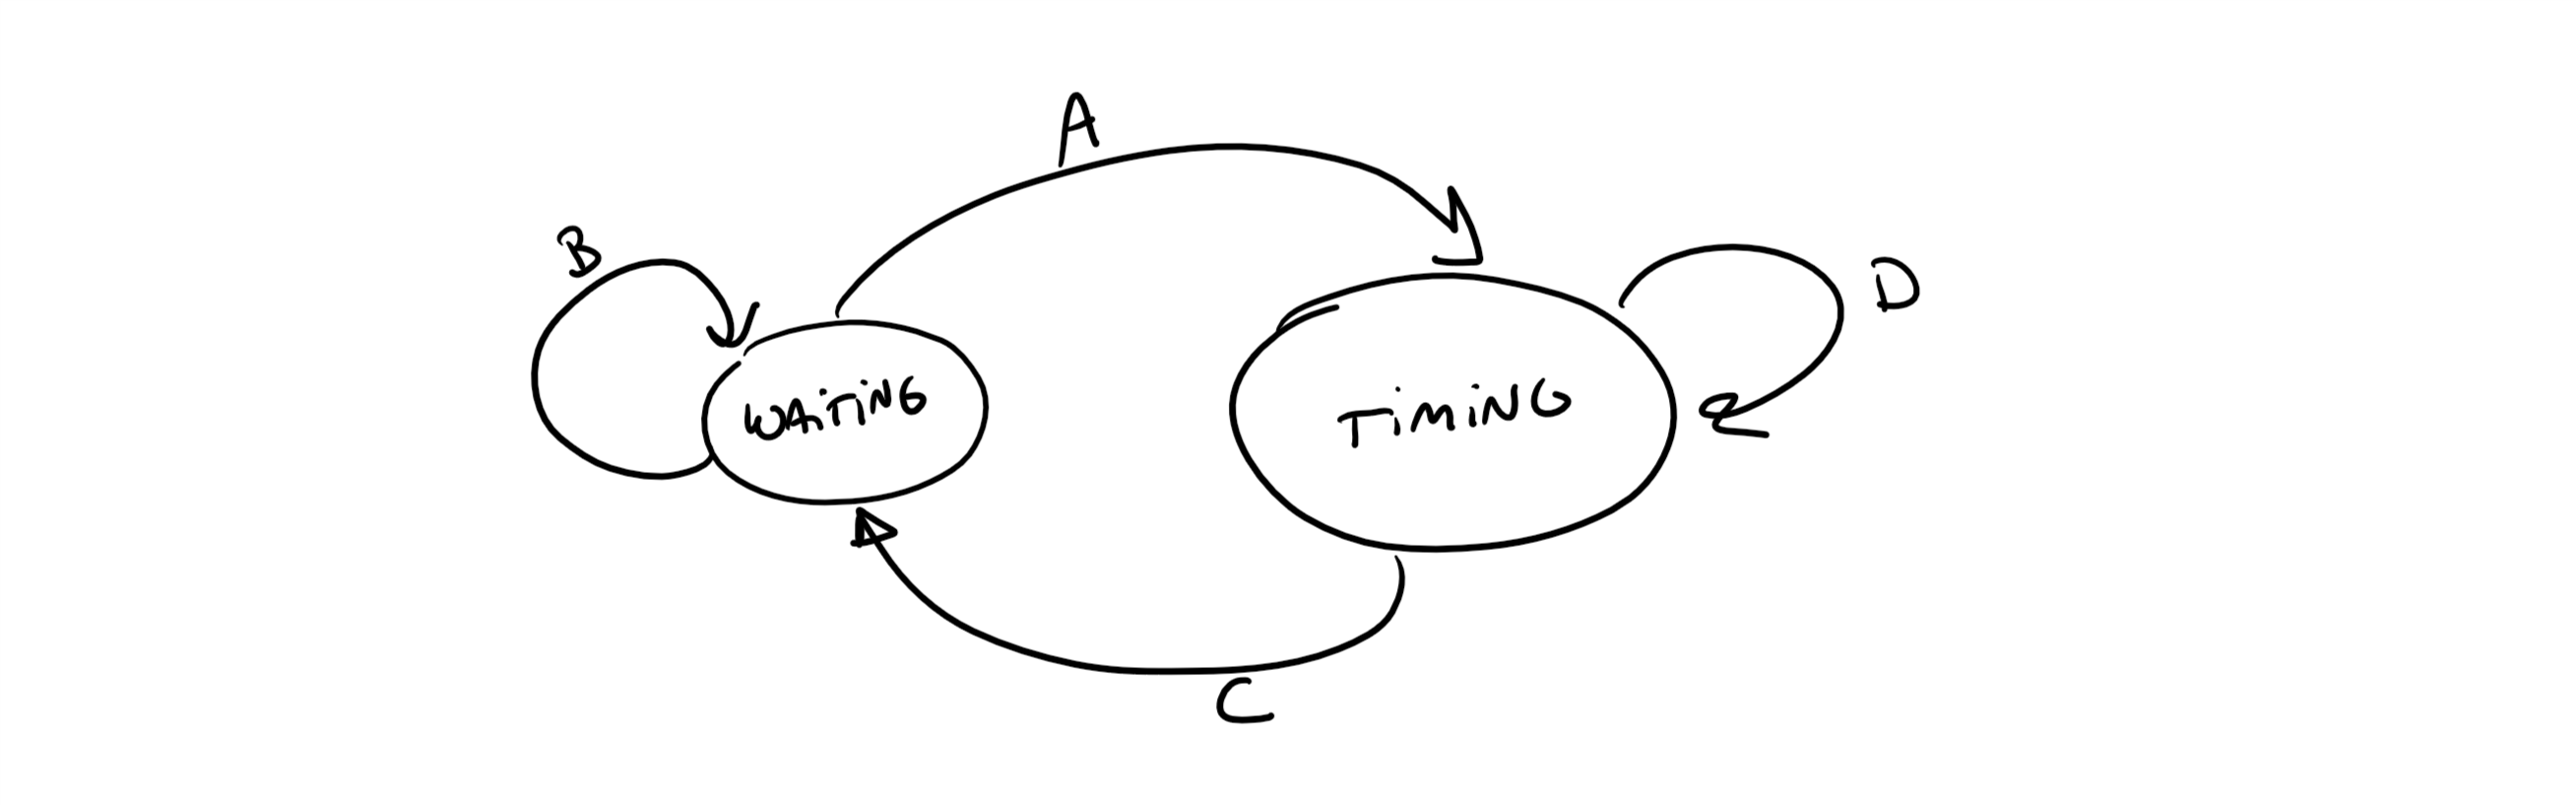

This is probably the simplest way to represent the timer. It's either waiting for an input, which we'll call TMR_EN, or it's timing the elapsed time since TMR_EN has been TRUE. You'll notice that we did not include the duration or the elapsed time as states, or mention them at all in the state transition diagram. This is because they're not possible to represent by a Boolean variable!! They're integer quantities.

You may be wondering if having non-Boolean components to your state machine "breaks the rules" of FSM design. The answer is that it does not. While only conditions and/or states that can be reduced to a Boolean TRUE or FALSE are allowed on a state transition diagram or in a state transition table, the "output" block of your Boolean Algebra Program (Block 4) can activate outputs and/or evaluate variables in logical tests (blocks 1-3) that are not Boolean in nature. So, while those variables aren't directly part of the state transition architecture of your system, you can use them in some contexts. We'll get a chance to try this very soon, but for now, let's construct a quick state transition table for the timer.

## State Transition Table

Using the simple design above, our state transition table is relatively simple. If TMR_EN is true, the machine is timing. If it is false, the machine is waiting.

|Transition | Start| Condition | End |
|---|---|---|---|
|$A$|$WAITING$|$TMR\_EN$|$TIMING$|
|$B$|$WAITING$|$\overline{TMR\_EN}$|$WAITING$|
|$C$|$TIMING$|$\overline{TMR\_EN}$|$WAITING$|
|$D$|$TIMING$|$TMR\_EN$|$TIMING$|

This is a good opportunity to practice your FSM design technique.  Think about this table to make sure all possible combinations of inputs are handled and that the table covers all logical possibilities adequately without breaking any rules (such as being in two states at once). This is the time to make sure this is the case... it is much easier to detect an error at this stage than to wait until you're testing your state machine only to discover that it can be in 5 states at once!!


# Model Development: Counters as Finite State Machines

Like a timer, a counter can be conceptualized as a finite state machine. The Boolean Algebra Simulator used in this course models counters with the following state transition diagram:

## State Transition Diagram

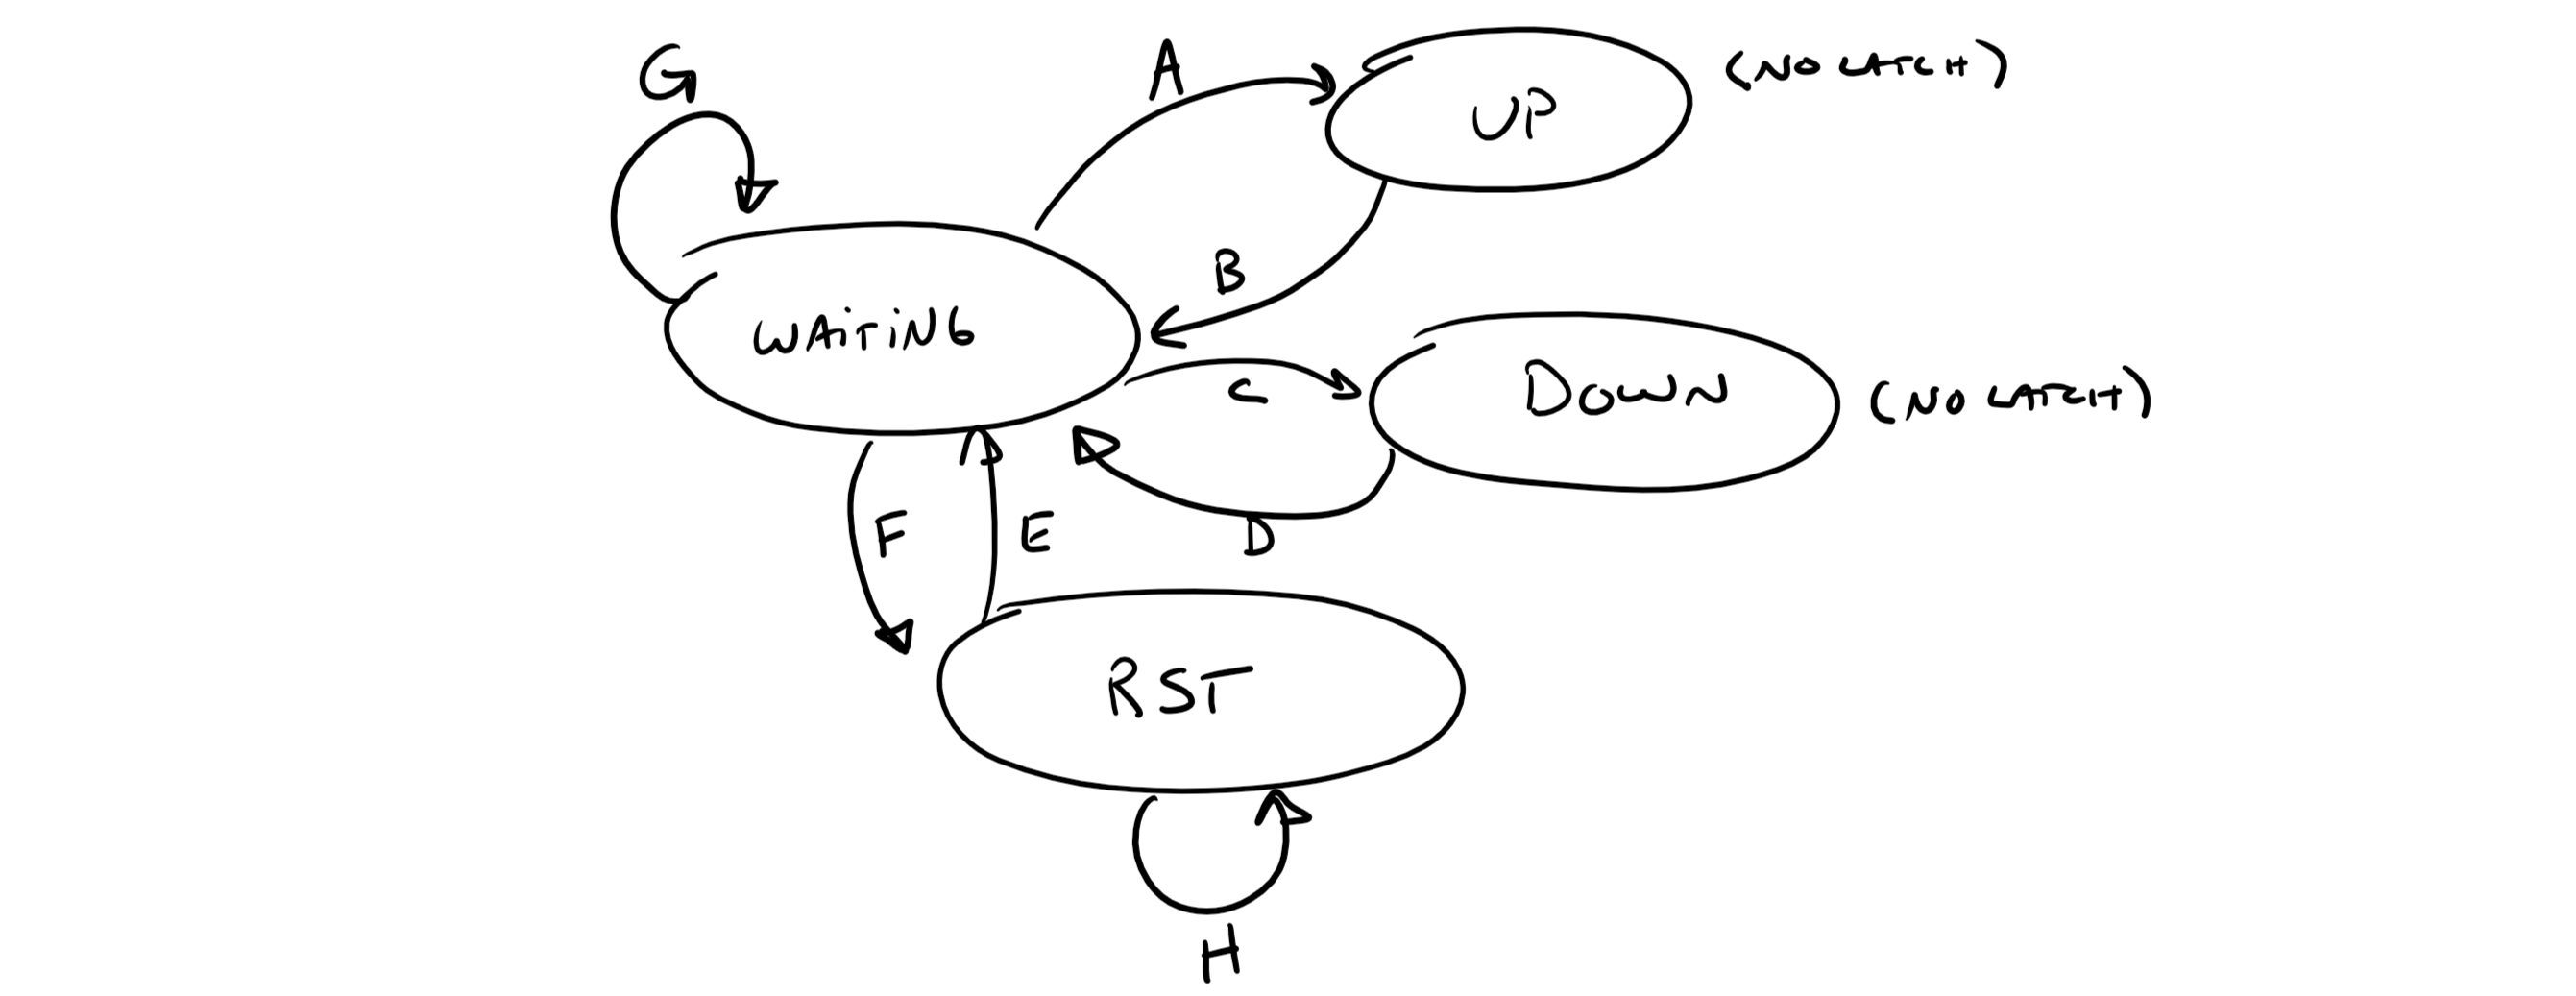

Remember that there is usually more than one effective way to organize a FSM and choose states, so don't be surprised if this isn't quite the way you would have organized this yourself. This structure is to point out something very specific. Notice that the "UP" and "DOWN" states do not have latches. This is intentional-- because we only want the counter to count up once for a unique press on the "count up" input (UP_IN), and then return to the "WAITING" state.  We will design our transitions so that the system can only be in "UP" for one loop of the logic program... no matter what.

A similar procedure will be followed for the "DOWN" state. Because we want to be able to clear the count at any time, the "RST" state will have a latch, so that setting the reset input "RST_IN" to true will always result in the counter starting with the accumulator at zero.

Given the state transition diagram above, we can develop the following state transition table.

## State Transition Table

|Transition| Start State | Condition | End State|
|:---:|:---:|:---:|:---:|
|$A$ | $WAITING$|   $UP\_PRS$ $\cdot\overline{(DN\_PRS+ RST\_IN)}$|$UP$|
|$B$ | $UP$ |  $1$ | $WAITING$ |
|$C$ | $WAITING$ |  $DN\_PRS$$\cdot\overline{(UP\_PRS+RST\_IN)}$ | $DOWN$ |
|$D$ | $DOWN$ |  $1$ | $WAITING$ | 
|$E$ | $WAITING$ |  $RST\_IN $ | $RST$|
|$F$ | $RST$ |  $RST\_IN$ | $RST$|
|$G$ | $WAITING$ |  $\overline{RST\_IN + UP\_PRS + DN\_PRS}+(UP\_IN \cdot(RST\_IN+DN\_PRS))+(DN\_PRS \cdot RST\_IN)$ | $WAITING$|
|$H$ | $RST$ |  $\overline{RST\_IN}$ | $WAITING$|
|.........|..............|............................................................................................................................................................................................|...............|

There are a few key items to discuss here. First, notice that the transition conditions do not allow for transitions out of the "WAITING" state if more than one button is pressed in the same loop. Secondly, notice that the variables "DN_PRS" and "UP_PRS" represent rising edges on the "UP_IN" and "DN_IN" variables. Also notice that the latch on the WAITING state attempts to handle situations in which more than one button is pressed at once, to avoid inadvertently counting when it is unclear what the user (or the program) wants.

This design may come in handy in later zumo projects or labs, but because you do not have an immediate need to implement a counter in software, no exercise is required.

# Exercise:  Submit as Part of Lab 2

## Controller Design: Vending Machine

To get some practice using counters and timers, consider a simplified version of a snack machine, like the one shown below.

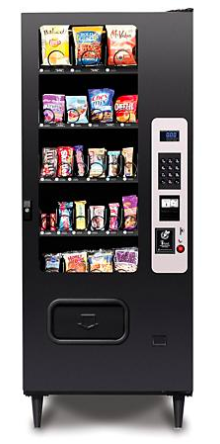

If you're really hungry, you can buy this machine from Sam's club [here](https://www.samsclub.com/p/sv3000-selectivend/prod21422777?&source=ifpla&itemNumber=980061909&CAWELAID=730010300001879524&pid=ps_CSE_Google_PLA_6451806614&wl0=&wl1=g&wl2=c&wl3=378128317615&wl4=pla-402483558450&wl5=9006934&wl6=&wl7=&wl9=pla&wl10=1247713&wl11=online&wl12={productid}&wl13=&wl15=74560770182&wl17=1o1&veh=sem&kclid=27d3df91-b6b6-4a27-b4e8-fa28fcfc21cf&gclid=EAIaIQobChMIwd_YtYCu5AIVFY_ICh0YSwVNEAQYASABEgLPE_D_BwE) but you will also have to buy snacks to put in it. (image credit: Sam's Club)

These types of machines use a motor driven wire screw to push product off the rack as illustrated in the video below for a similar machine. You can find a machine just like this on the 5th floor on the way to office hours!

In [1]:
%%html
<iframe width="600" height="400" src="https://www.youtube.com/embed/rMz18_M1cyY?start=0&end=37" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Imagine a version of this machine that only dispenses one product... for free. Whenever a user presses the momentary button 1 on your workstation, the machine turns on a screw motor (simulated on the LCD display) for that product for 1 second to dispense it. Then, it returns to a "ready" condition and waits for another input on button 1.

However, the machine knows that the screw only holds 5 snacks. Therefore, after the machine has dispensed 5 snacks, it will no longer turn on motor when the button is pressed. After it is empty, a technician must refill the machine and reset it by pressing a reset button in order to allow it to dispense more product.




### Controller Design and Validation: Timers

**WE WILL NOT USE YOUR WORKSTATION MOTOR FOR THESE EXERCISES!**

*This is just practice so we'll use your workstation and LCD display only* 

You can assess your understanding by trying each piece separately on your workstation.  Start with the timer. The code below has the framework for a timer design and uses the LCD display to output the state of the motor (we won't really run your motor since this is just practice).  For this design, the timer should run when you hold down BTN1 on your workstation.  While you are holding the button the motor should show "ON" on the display and the time should reach 1 second.  At times greater than 1 second the motor should show "OFF".  If you let go of the button the time should reset.

``` c++
#include <LiquidCrystal.h> //include LCD library

//initialize boolean variables for the timer
boolean TMR1_waiting=true; //waiting state. By setting this true the FSM will BEGIN in waiting!
boolean TMR1_timing=false; //timing state
boolean TMR1_enable=false; //set by exterinal input
boolean TMR1 = false; // true if timer has reached its duration

int TMR1_elapsed = 0; //elapsed time
int TMR1_starttime = millis(); //CHECKOUT THIS FUNCTION IN THE ARDUINO RESOURCE!
int TMR1_duration = 3000; //duration of the timer in milliseconds

//This variable represents the output of the FSM.
//Set to true to turn on the motor on the LDC display
//Set to false to turn off on the display
boolean Motor = false; 

// Pin numbers for LDC display
int lcd_rs_pin = 14;
int lcd_en_pin = 15;
int lcd_db4_pin = 16;
int lcd_db5_pin = 17;
int lcd_db6_pin = 18;
int lcd_db7_pin = 19;

// Initialize the library with the numbers of the interface pins
LiquidCrystal LCD(lcd_rs_pin, lcd_en_pin, lcd_db4_pin, lcd_db5_pin, lcd_db6_pin, lcd_db7_pin);

//setup function runs once
void setup(){
// set up the LCD's number of columns and rows:
LCD.begin(8, 2);
}

//this function runs over and over forever!
void loop(){

  // BLOCK 1: Process Inputs
  //----------------------------------------

  // You will need to check the state of the switch here and use it to set TMR1_enable 
  // because you'll need that for your transition logic
    
  // BLOCK 2: State Transition Logic
  //---------------------------------------- 
   
  
    
  // BLOCK 3: Update States
  //---------------------------------------- 

  
  
    
  // BLOCK 4: Set Outputs and Old Variables
  //----------------------------------------   

  // Here you will need to update the timer output (TMR1) and the Motor based
  // on the states updated above.


  //Output Motor State and time to LCD display
  LCD.clear();
  if (Motor)
  {
  LCD.print("MTR: ON");
 
  }
  else{
  LCD.print("MTR: OFF");
  }
  LCD.setCursor(0,1);
  LCD.print("TIME: ");
  LCD.print(elapsed);

  //delay 100 milliseconds to control the sampling rate and LCD flickering
  delay(100);
}
```


## Controller Design and Validation: Counters

**AGAIN, WE WILL NOT USE YOUR WORKSTATION MOTOR FOR THESE EXERCISES!**

In the example below you will use BTN1 to "dispense" the items and have a counter keep track of how many times you press the button.  The LCD is configured to turn your button counts into ITEMS LEFT.  It begins with 5 items.  When it reaches the counter preset value, which should be 5 button presses, it will display "EMPTY". Use BTN 2 to reset the counter and "reload" the machine.

``` c++
#include <LiquidCrystal.h> //include LCD library

//initialize boolean variables for the timer
boolean CNT1_waiting=true; //waiting state
boolean CNT1_up=false; //count up state
boolean CNT1_down=false; //coutn down state
boolean CNT1_reset = false; // reset state
boolean CNT1 = false; // true if counter has reached its preseet

int CNT1_count= 0; //value of the current count
int CNT1_preset = 2; //at this value the counter output will be true

// Pin numbers for LDC display
int lcd_rs_pin = 14;
int lcd_en_pin = 15;
int lcd_db4_pin = 16;
int lcd_db5_pin = 17;
int lcd_db6_pin = 18;
int lcd_db7_pin = 19;

// Initialize the library with the numbers of the interface pins
LiquidCrystal LCD(lcd_rs_pin, lcd_en_pin, lcd_db4_pin, lcd_db5_pin, lcd_db6_pin, lcd_db7_pin);

//setup function runs once
void setup(){
// set up the LCD's number of columns and rows:
LCD.begin(8, 2);
}

//this function runs over and over forever!
void loop(){

  // BLOCK 1: Process Inputs
  //----------------------------------------

  // You will need to check the state of the buttons and use it as input 
  // to your transitions.
  // You will want to make sure to not accept input after you have 
  // reached the preset.
    
  // BLOCK 2: State Transition Logic
  //---------------------------------------- 
   
  
    
  // BLOCK 3: Update States
  //---------------------------------------- 

  
  
    
  // BLOCK 4: Set Outputs and Old Variables
  //----------------------------------------   

  // Here you will need to update the value of actual count
  // as well as determine if the preset has been reached

  // Note your Counter will count BUTTON PRESSES.  The display
  // will show product remaining.


  //Output the current count and if empty
  LCD.clear();
  LCD.print("ITEMSS: ");
  LCD.print(5-CNT1_count);
  if (CNT1){
    LCD.setCursor(0,1);
    LCD.print("EMPTY");
  } 

  //delay 100 milliseconds to control the sampling rate and LCD flickering
  delay(100);
}
```